In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.txt', sep=',')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)

# Create a custom colormap: one color for TP+TN, another for FP+FN
colors = ['lightblue', 'lightcoral']
custom_cmap = plt.cm.colors.ListedColormap(colors)

# Define a matrix for coloring based on TP, TN, FP, FN
colored_cm = np.zeros_like(cm, dtype=int)
for i in range(len(cm)):
    for j in range(len(cm)):
        if i == j:  # TP or TN
            colored_cm[i, j] = 0
        else:  # FP or FN
            colored_cm[i, j] = 1

# Plot the confusion matrix with custom colors
fig, ax = plt.subplots()
im = ax.imshow(colored_cm, cmap=custom_cmap)

# Add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = 'black'  # Text color for better contrast
        ax.text(j, i, cm[i, j], ha='center', va='center', color=color)

# Add axis labels and titles
ax.set_xticks(range(len(['Not Survived', 'Survived'])))
ax.set_yticks(range(len(['Not Survived', 'Survived'])))
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.set_yticklabels(['Not Survived', 'Survived'])
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')

plt.show()

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.impute import SimpleImputer

# Ensure 'Sex' is numeric (convert to 0/1 if necessary)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']] = imputer.fit_transform(df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']])

# Fit the Poisson GLM
glm_model = smf.glm(formula="Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare",
                    data=df, 
                    family=sm.families.Binomial()).fit()

# Display model summary
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -394.36
Date:                Thu, 05 Dec 2024   Deviance:                       788.73
Time:                        11:04:23   Pearson chi2:                     910.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3602
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1975      0.480      4.580      0.0

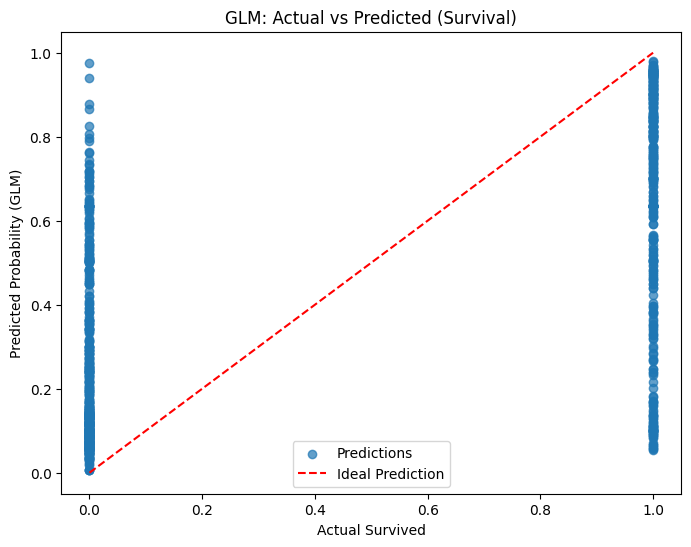

In [5]:
# Add predictions to the dataset
df['GLM_Predictions'] = glm_model.predict(df)

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(df['Survived'], df['GLM_Predictions'], alpha=0.7, label='Predictions')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Probability (GLM)')
plt.title('GLM: Actual vs Predicted (Survival)')
plt.legend()
plt.show()

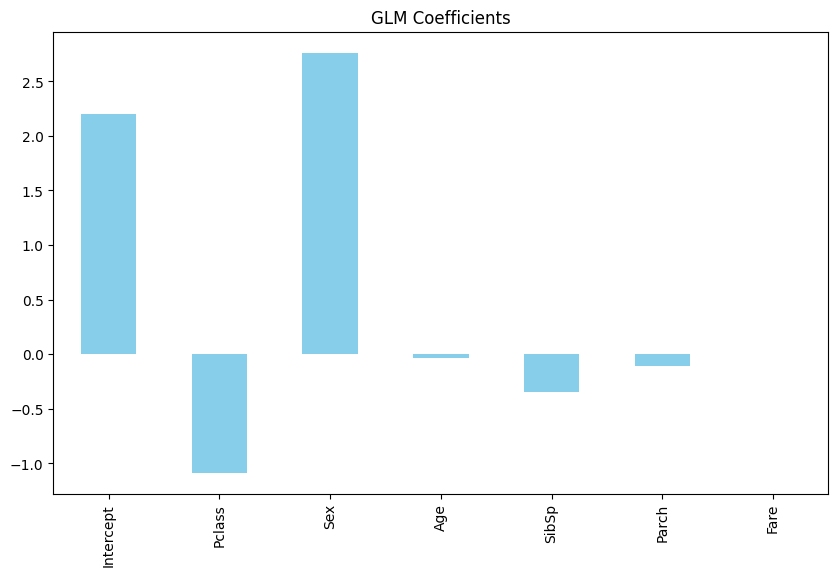

In [6]:
coefficients = glm_model.params
coefficients.plot(kind='bar', figsize=(10, 6), color='skyblue', title='GLM Coefficients')
plt.show()

Logistic Regression Performance:
Accuracy: 0.8101
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Decision Tree Classifier Performance:
Accuracy: 0.8045
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179

GLM Performance:
Accuracy: 0.8101
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79   

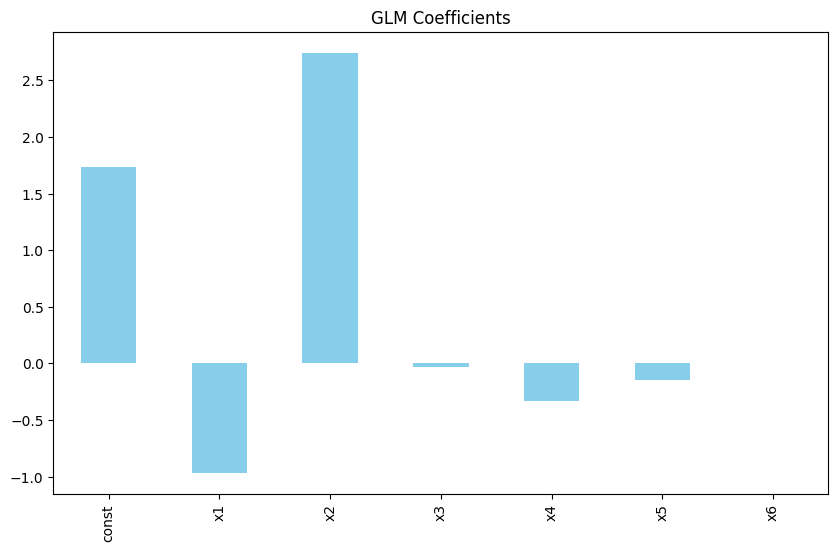

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
import pandas as pd

# Assuming titanic_data is preprocessed and loaded
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]  # Example features
y = df['Survived']  # Target variable

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

# 2. Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Add predictions to the dataset
df['DT_Predictions'] = tree_model.predict(X)

# Evaluate Decision Tree Classifier
print("Decision Tree Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# 3. GLM using Statsmodels
glm_model = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
glm_results = glm_model.fit()
glm_pred = glm_results.predict(sm.add_constant(X_test)) > 0.5  # Binary classification threshold

# Add predictions to the dataset
df['GLM_Predictions'] = glm_results.predict(sm.add_constant(X))

# Evaluate GLM
print("GLM Performance:")
print(f"Accuracy: {accuracy_score(y_test, glm_pred):.4f}")
print("Classification Report:\n", classification_report(y_test, glm_pred))

# Visualize Coefficients for GLM
glm_coefficients = glm_results.params
glm_coefficients.plot(kind='bar', figsize=(10, 6), color='skyblue', title='GLM Coefficients')
plt.show()

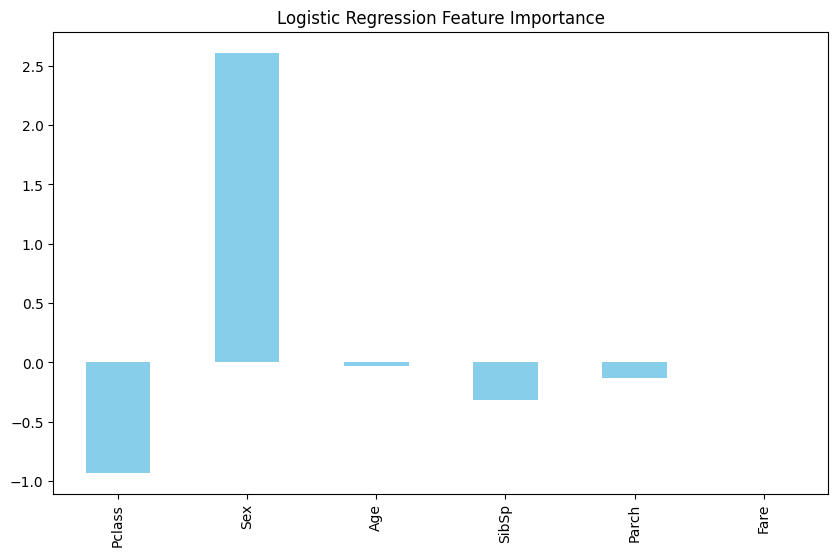

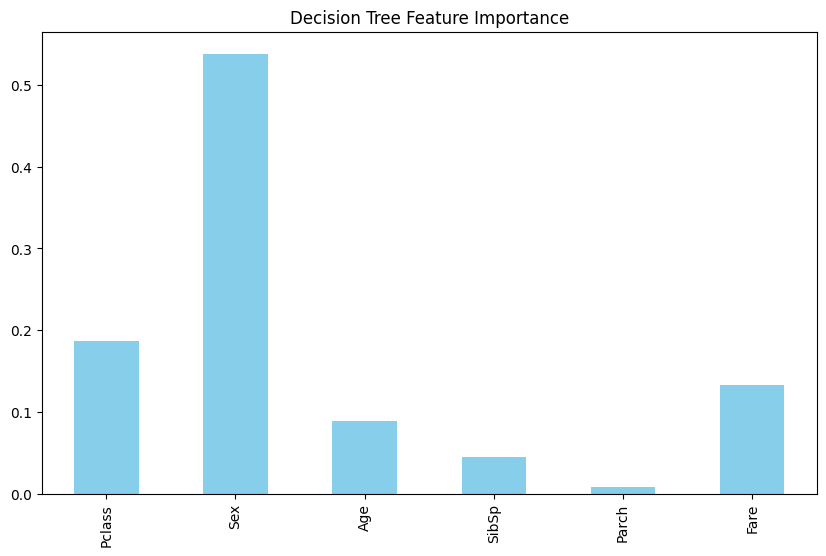

In [23]:
# Feature importance for Logistic Regression
logistic_importance = pd.Series(logistic_model.coef_[0], index=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])
logistic_importance.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Logistic Regression Feature Importance')
plt.show()

# Feature importance for Decision Tree
tree_importance = pd.Series(tree_model.feature_importances_, index=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'])
tree_importance.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Decision Tree Feature Importance')
plt.show()

Comparison of Models:
GLM Accuracy: 0.8101
Decision Tree Accuracy: 0.8045


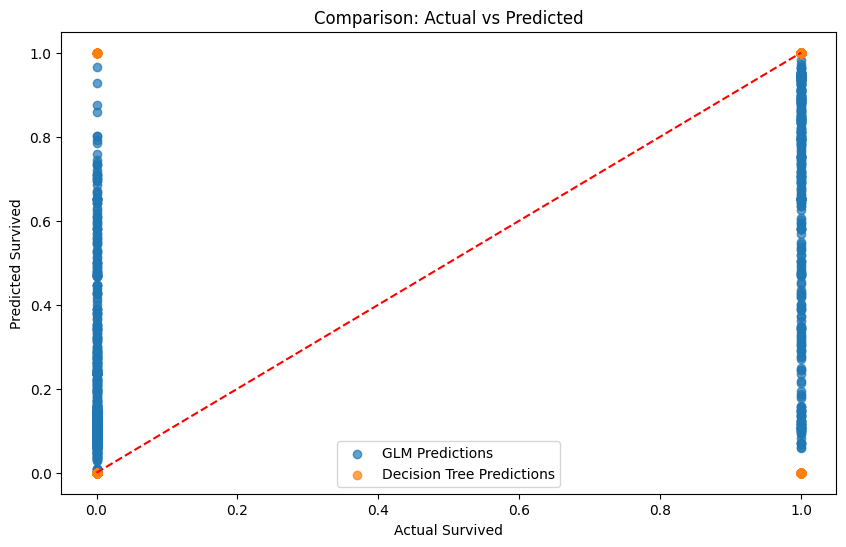

In [16]:
print("Comparison of Models:")
print(f"GLM Accuracy: {accuracy_score(y_test, glm_pred):.4f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")

# Combine both predictions into a plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Survived'], df['GLM_Predictions'], label='GLM Predictions', alpha=0.7)
plt.scatter(df['Survived'], df['DT_Predictions'], label='Decision Tree Predictions', alpha=0.7)
plt.plot([0, max(df['Survived'])], [0, max(df['Survived'])], color='red', linestyle='--')
plt.xlabel('Actual Survived')
plt.ylabel('Predicted Survived')
plt.title('Comparison: Actual vs Predicted')
plt.legend()
plt.show()

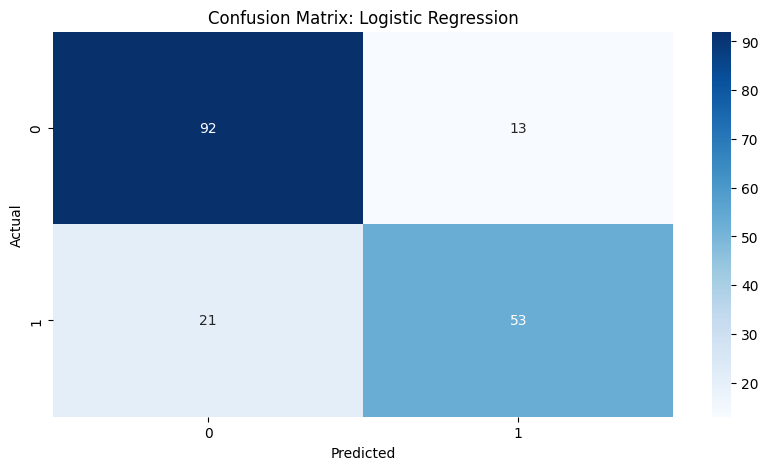

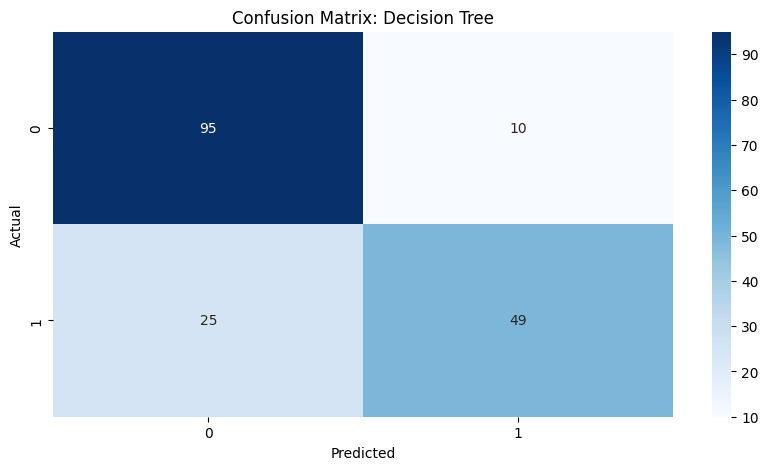

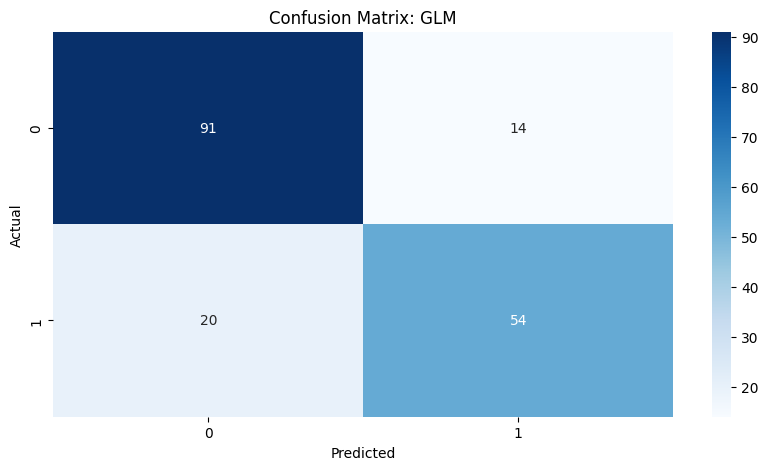

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(10, 5))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for Decision Tree
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(10, 5))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Assuming `y_pred_glm` contains the predicted probabilities from the GLM
# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred_glm_binary = (glm_pred >= 0.5).astype(int)

# Confusion matrix for GLM
cm_glm = confusion_matrix(y_test, y_pred_glm_binary)
plt.figure(figsize=(10, 5))
sns.heatmap(cm_glm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: GLM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()